In [1]:
import pandas as pd

In [2]:
df_betting_odds = pd.read_csv('odds_w_outcomes.csv')
df_betting_odds



,fighter1,fighter2,fight_odds_url,Bet,5Dimes,Bet365,BetDSI,BetOnline,BookMaker,Bovada,...,Loser_url,event_order,Method_Cleaned,Card_Cleaned,Champion,Interim_Champion,Card_Date,#,Event,bet_won
0,Aalon Cruz,Spike Carlyle,https://www.bestfightodds.com/events/ufc-on-es...,Aalon Cruz,1.540541,1.571429,1.510204,1.540541,1.500000,1.500000,...,NaN,11,KO,Prelim,NaN,NaN,2020-02-29,511,UFC Fight Night: Benavidez vs. Figueiredo,0
1,Aalon Cruz,Spike Carlyle,https://www.bestfightodds.com/events/ufc-on-es...,Spike Carlyle,2.700000,2.500000,2.630000,2.600000,2.580000,2.600000,...,NaN,11,KO,Prelim,NaN,NaN,2020-02-29,511,UFC Fight Night: Benavidez vs. Figueiredo,1
2,Aaron Phillips,Matt Hobar,https://www.bestfightodds.com/events/ufc-fight...,Aaron Phillips,2.880000,NaN,2.800000,2.800000,2.800000,2.750000,...,NaN,9,Unanimous Decision,Prelim,NaN,NaN,2014-08-23,287,UFC Fight Night: Henderson vs. dos Anjos,0
3,Aaron Phillips,Matt Hobar,https://www.bestfightodds.com/events/ufc-fight...,Matt Hobar,1.487805,NaN,1.476190,1.476190,1.476190,1.444444,...,NaN,9,Unanimous Decision,Prelim,NaN,NaN,2014-08-23,287,UFC Fight Night: Henderson vs. dos Anjos,1
4,Aaron Phillips,Sam Sicilia,https://www.bestfightodds.com/events/ufc-173-b...,Aaron Phillips,2.300000,NaN,2.250000,2.300000,2.250000,2.250000,...,NaN,11,Unanimous Decision,Prelim,NaN,NaN,2014-05-24,273,UFC 173: Barão vs. Dillashaw,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9399,Wilson Reis,Yuta Sasaki,https://www.bestfightodds.com/events/ufc-208-h...,Yuta Sasaki,1.165289,NaN,1.160772,1.166667,1.160772,1.166667,...,https://en.wikipedia.org/wiki/Ulka_Sasaki,7,Unanimous Decision,Prelim,NaN,NaN,2017-02-11,389,UFC 208: Holm vs. de Randamie,0
9400,Yan Cabral,Zak Cummings,https://www.bestfightodds.com/events/ufc-fight...,Yan Cabral,1.232558,NaN,1.215054,1.212766,1.215054,1.222222,...,https://en.wikipedia.org/wiki/Yan_Cabral,9,Unanimous Decision,Prelim,NaN,NaN,2014-05-10,272,UFC Fight Night: Brown vs. Silva,0
9401,Yan Cabral,Zak Cummings,https://www.bestfightodds.com/events/ufc-fight...,Zak Cummings,4.800000,NaN,4.650000,4.700000,4.650000,4.250000,...,https://en.wikipedia.org/wiki/Yan_Cabral,9,Unanimous Decision,Prelim,NaN,NaN,2014-05-10,272,UFC Fight Night: Brown vs. Silva,1
9402,Yancy Medeiros,Yves Edwards,https://www.bestfightodds.com/events/ufc-fight...,Yancy Medeiros,1.571429,NaN,1.540541,1.540541,1.540541,1.526316,...,https://en.wikipedia.org/wiki/Yves_Edwards,11,NaN,Prelim,NaN,NaN,2013-11-06,251,UFC: Fight for the Troops 3,1


In [3]:
df_betting_odds = df_betting_odds[['fighter1','fighter2','Bet','5Dimes','bet_won']].dropna()

In [4]:
df_betting_odds[df_betting_odds['5Dimes']<=2]['bet_won'].mean()
# df_betting_odds

0.6440233823825842

## Looks like the favorite wins 64% in Vegas

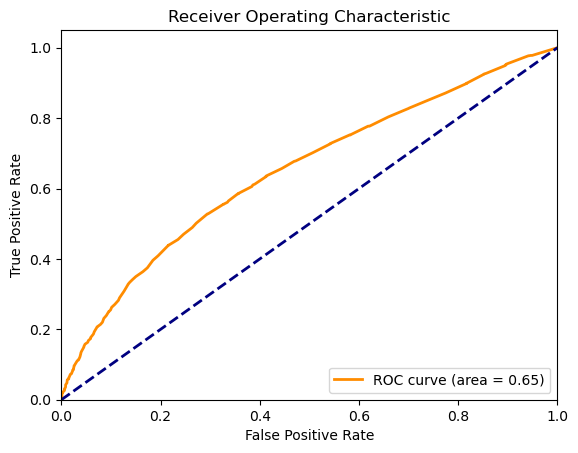

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 

df_betting_odds['pred_prob'] = 1/(df_betting_odds['5Dimes'])
df_faves = df_betting_odds[df_betting_odds['5Dimes'] <=2]


fpr, tpr, thresholds = roc_curve(df_faves['bet_won'], df_faves['pred_prob'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
import pickle

# Assuming fpr, tpr, and roc_auc are your ROC curve data for the betting odds model
roc_data_betting = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Saving data to a pickle file
with open('roc_data_betting.pkl', 'wb') as file:
    pickle.dump(roc_data_betting, file)


In [6]:
df_preds = pd.read_csv('RF_prediction_values.csv')
df_preds = df_preds[['date','fighter_fighter1','opponent_fighter1','result_fighter1','fighter1_prob','opponent_prob']]

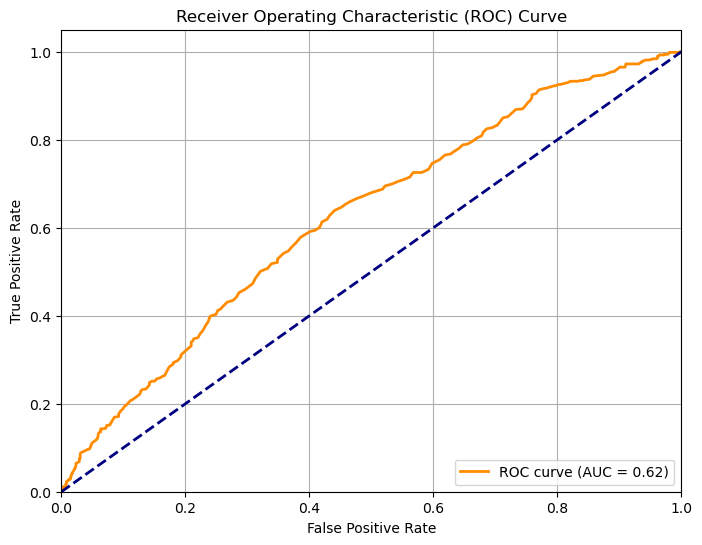

In [7]:
# df_preds.drop('Unnamed: 0',axis=1)
df = df_preds


fpr, tpr, thresholds = roc_curve(df['result_fighter1'], df['fighter1_prob'])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [8]:
df_betting_odds[df_betting_odds.isnull().any(axis=1)]


,fighter1,fighter2,Bet,5Dimes,bet_won,pred_prob


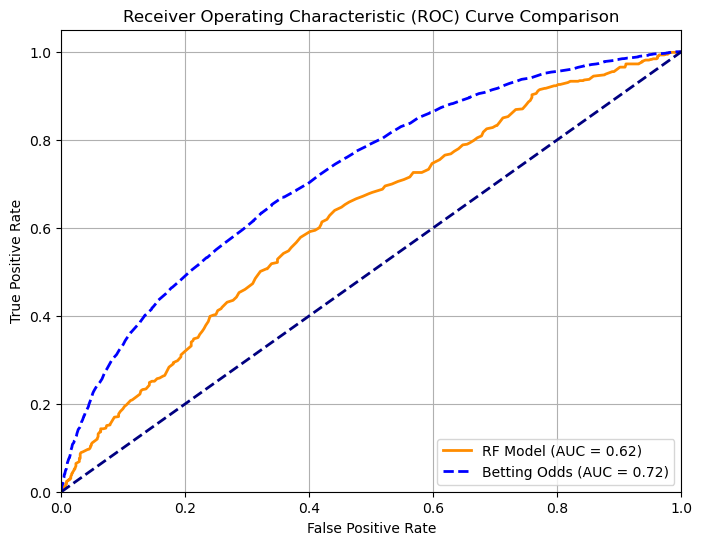

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# First set of predictions
fpr1, tpr1, thresholds1 = roc_curve(df['result_fighter1'], df['fighter1_prob'])
roc_auc1 = auc(fpr1, tpr1)

# Second set of predictions
fpr2, tpr2, thresholds2 = roc_curve(df_betting_odds['bet_won'], df_betting_odds['pred_prob'])
roc_auc2 = auc(fpr2, tpr2)

# Plotting both ROC curves on the same figure
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'RF Model (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='blue', lw=2, linestyle='--', label=f'Betting Odds (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [10]:
# df_betting_odds['Card_Date'] = pd.to_datetime(df_betting_odds['Card_Date'])
# df_preds['date'] = pd.to_datetime(df_preds['date'])
# df_preds.rename(columns={'fighter_fighter1': 'fighter1', 'opponent_fighter1': 'fighter2'}, inplace=True)


# df_betting_odds['fighter1'] = df_betting_odds['fighter1'].str.lower()
# df_betting_odds['fighter2'] = df_betting_odds['fighter2'].str.lower()
# df_betting_odds['Bet'] = df_betting_odds['Bet'].str.lower()


In [11]:
# Filter df_betting_odds for events after 2010
df_betting_odds[df_betting_odds['Card_Date'] > pd.Timestamp('2019-12-31')]

df_preds[df_preds['fighter2']=='aalon cruz']

KeyError: 'Card_Date'

In [ ]:
unique_fighters = pd.concat([df_betting_odds['fighter1'], df_betting_odds['fighter2']]).unique()

# Convert to a list
df_betting_odds_unique_fighters_list = unique_fighters.tolist()


In [ ]:
unique_fighters_preds = pd.concat([df_preds['fighter1'], df_preds['fighter2']]).unique()

# Convert to a list
unique_fighters_preds_list = unique_fighters_preds.tolist()


In [ ]:
df_betting_odds_unique_fighters_list = set(df_betting_odds_unique_fighters_list)
unique_fighters_preds_list = set(unique_fighters_preds_list)

common_fighter_names = unique_fighters_preds_list.intersection(df_betting_odds_unique_fighters_list)

common_fighter_names_list = list(common_fighter_names)



In [ ]:
len(common_fighter_names_list)
# Filter rows where both 'fighter1' and 'fighter2' are in the list of common fighter names
filtered_df_betting_odds = df_betting_odds[
    df_betting_odds['fighter1'].isin(common_fighter_names_list) &
    df_betting_odds['fighter2'].isin(common_fighter_names_list)
]

# Filter rows where both 'fighter1' and 'fighter2' are in the list of common fighter names
filtered_df_preds = df_preds[
    df_preds['fighter1'].isin(common_fighter_names_list) &
    df_preds['fighter2'].isin(common_fighter_names_list)
]

filtered_df_betting_odds


,fighter1,fighter2,Bet,BetOnline,Card_Date,bet_won
0,aalon cruz,spike carlyle,aalon cruz,1.540541,2020-02-29,0
1,aalon cruz,spike carlyle,spike carlyle,2.600000,2020-02-29,1
52,abdul razak alhassan,niko price,abdul razak alhassan,1.813008,2018-09-08,1
53,abdul razak alhassan,niko price,niko price,2.030000,2018-09-08,0
54,abdul razak alhassan,omari akhmedov,abdul razak alhassan,1.408163,2017-05-28,0
...,...,...,...,...,...,...
9353,thiago santos,uriah hall,uriah hall,1.210526,2014-07-05,1
9372,tracy cortez,vanessa melo,tracy cortez,1.487805,2019-11-16,1
9373,tracy cortez,vanessa melo,vanessa melo,2.750000,2019-11-16,0
9374,trevin giles,zak cummings,trevin giles,1.666667,2019-05-18,0


In [ ]:
filtered_df_preds[filtered_df_preds['fighter2']=='thiago santos']

,date,fighter1,fighter2,result_fighter1,fighter1_prob,opponent_prob
162,2020-11-07,glover teixeira,thiago santos,1,0.424,0.576
322,2021-03-06,aleksandar rakic,thiago santos,1,0.680,0.320
605,2021-10-02,johnny walker,thiago santos,0,0.598,0.402
832,2022-03-12,magomed ankalaev,thiago santos,1,0.656,0.344
1056,2022-08-06,jamahal hill,thiago santos,1,0.716,0.284


Looks at AUC's betting odds vs. predictions

Play with features (differentials of sig. strikes for example), hyperparameters of ANNs (add more layers to ann)

Maybe add ER's from each of last 5 rounds (recalibarate top feature scoring)

Explore dropping some features that are not doing so well

Compute relative stats (age, height, )

Plot age vs. Win Percentage

What if older fighter wins? (baseline model?)





Took out stance, 
tried last 5 ER scores made it worse,
 the difference betwen sig strikes also made it worse, 
 changed sig strike global figure to 0.07 from 2.6

Added more layers to ANN

Division slightly helped so kept it in, 


Overall goal predicting winner of a fight
Future -> all features are data from pre-fight

Ways to predict a fight -> betting odds (accuracy and ROC)
2. baseline -> comparing previous win ratio or compare ages
Plot out accuracy and ROC for the baselines 

3. Model -> ANN or RF model

the hope was that the model, would do better than the betting odds/other baselines

    Model inputs 2 stories:

    1. Creating more nuanced feature oon past performance 
    2. feature filtering and exploration



Go into background on ANN, RF, and data collection (scraping), personal realizations, what kinds of things take up the most time, surpirsed by results, what wouldve been next steps 

Figure out what conclusions i would make if i stopped here 
Might be a good idea to spend some time figuring out what goes into betting odds 
Expert opinions 

Are there ways of looking at the features that are better 

Post on reddit, wisdom of the crowd, 

Try shuffling different hyperparameters 


Get AUC and Accuracy scores for a bunch of models to compare 



A week before type of 0.5-1 page about what the project is about and what im hoping theyre evaluating me on (treat it like an abstract)


might be worth trying other models (linear regression, logistic regression, etc. )

Dig into which features the model tends to be more or less valuable to the model 
    e.g. more experience, aka more data,
    or less data was better? 

    are newer fights more accurate than older fights, geographical location, 


4/9 Notes

* Look into other models for first layer 


In presentation:
1. Future steps:
    New models for current problem
    New problems and how current work inspires future approaches

    Performance being sports dependent instead of model depedant 
    (maybe a lot more subjectivity in fighting)
    Motivation for work / future steps


Send out scheduling emails 

Last minute things 

Ping down points that i want in my presentation

* Take home messages
    * Highlight what the take home messages are going to be
    * make sure what parts of the presentation actually emphasies the messages
    * Target 3 takehomemessages give or take 1 
    * 
    

Presentation should be around 45 minutes 15 to for Q&A

In Presentation:
Discuss whether or not the work reflects 3 credits 
When they ask questions can i answer them or speculate in an informative matter on why the results looked a certain way

Can also reference program handbook 
Frames Problem, Explains results achieved, to calfiy what i did at certain points in the project

** 2 page writeup **

book room with cleopatra after 

Goal for next week come up with some figures for the presentation 

and tell Prof. Ma what the 3 takehome messages are 